## Web Scraping

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
import pandas as pd

import requests
from bs4 import BeautifulSoup


import time
import datetime

In [ ]:
 headers = {'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36'}


def P_news_scraper(maxpage):
    
    news_df = pd.DataFrame(columns=("Title", "Datetime", "Article"))
    index = 0 
        
    page = 1
    maxpage_t =(int(maxpage)-1)+1  

    
    while page <= maxpage_t:
        
        url = 'https://search.mt.co.kr/searchNewsList.html?srchFd=TOTAL&range=IN&reSrchFlag=&preKwd=&search_type=m&kwd=ESG&bgndt=20210427&enddt=20220427&category=MTNW&sortType=allwordsyn&subYear=&category=MTNW&subType=mt'+'&pageNum='+str(page)
        
        req = requests.get(url)
        
        cont = req.content
        soup = BeautifulSoup(cont, 'html.parser')
        
        for urls in soup.select("div.section div.con > strong.subject > a"):
            
            try:
                if urls["href"].startswith("https://news.mt.co.kr/"):    
                        
                        newsreq = requests.get(urls["href"], headers = headers) #  
                        
                        bsoup = BeautifulSoup(newsreq.content, 'html.parser')
                        
                        title = bsoup.select('h1.subject')[0].text       
    

                        newsdate = bsoup.select('li.date')[0].get_text()[:10]


                        btext = bsoup.select('#textBody')[0].get_text().replace('\n', " ").replace('\t', " ")
                        article = btext.replace("// flash 오류를 우회하기 위한 함수 추가 function _flash_removeCallback() {}", "")
                    
                        
                        news_df.loc[index] = [title, newsdate, article]
                        index += 1              
                                            

            except Exception as e:
                continue
        page += 1
    
    return news_df 

news_df = P_news_scraper(10)


NameError: ignored

In [ ]:
news_df.shape

(200, 3)

In [ ]:
news_df.head(5)

,Title,Datetime,Article
0,"주한영국대사관, '한·영 클린테크 비즈니스 콘퍼런스' 개최",2022.04.27,"주한영국대사관은 전북테크노파크와 탈탄소 산업 혁신과 관련 산업 육성, 미래 클..."
1,"ESG 보고서 발간 건수, 국민연금 거래증권사 선정 당락 가른다",2022.04.27,임종철 디자인기자 /사진=임종철 디자인기자 ESG(환경·사회·지배구조) 관련 분...
2,"바이루트, 에이치엔비웰과 ESG 경영 강화을 위한 업무 협약",2022.04.27,허태욱 바이루트 대표(사진 왼쪽)와 김용수 에이치엔비웰 대표가 업무 협약을 체결하...
3,"[더벨]휴림로봇, ‘넷제로 2050 기후재단’ 주최 포럼 참가",2022.04.27,"더벨'머니투데이 thebell'에 출고된 기사입니다. 휴림로봇 (2,750원 ..."
4,"""원전 2년에 1개씩 짓는다""...유럽이 다시 원전에 꽂힌 이유",2022.04.27,정재훈 한국수력원자력 사장(한국원자력산업협회장·왼쪽 일곱번째)을 포함한 참석자들이...


In [ ]:
news_df.tail(5)


,Title,Datetime,Article
195,"이창양 산업장관 후보자 ""무거운 책임감…규제 혁파할 것""",2022.04.10,"이창양 산업통상자원부 장관 후보자 이창양 산업부장관 후보자가 10일 ""인사청문회..."
196,[프로필]尹정부 첫 산업장관 이창양…OB출신의 팔방미인,2022.04.10,이창양 산업통상자원부 장관 후보자 /사진제공=대통령직 인수위원회 윤석열 정부 ...
197,한덕수 총리 후보자 19억 고문료 논란…로펌 고문들 무슨일 하길래,2022.04.09,한덕수 국무총리 후보자/사진=뉴시스 한덕수 국무총리 후보자가 새 정부 초대 총리...
198,"커피베이, 꾸준한 사회공헌활동 통해 ESG 경영 실천",2022.04.08,대한상공회의소 조사 결과에 따르면 MZ세대 10명 가운데 6명(64.5%)은 더...
199,"계명대, 지속 가능한 성장 위해 ESG경영 도입",2022.04.08,계명대학교가 지난 7일 성서캠퍼스 산학협력관에서 '제1회 계명ESG 실행위원회...


In [ ]:
# file 저장
file_path =  "/content/gdrive/My Drive/Colab Notebooks/TXTData/"

file_name = "머니투데이_뉴스_" + "ESG" + ".csv"

file_full_path = file_path + file_name

news_df.to_csv(file_full_path ,  index = False, encoding="utf-8-sig")  

## Analyze & Visualization

In [ ]:
!sudo apt-get install -y fonts-nanum    # 글꼴 설치
!sudo fc-cache -fv                      
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 41 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (6,558 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155514 files and d

In [ ]:
import  matplotlib 
import  matplotlib.font_manager  as fm
import  matplotlib.pyplot  as plt


print('◎ matplotlib version : ', matplotlib.__version__)
print()


sys_font  = fm.findSystemFonts ( )

[ font  for  font  in  sys_font  if  "Nanum"  in font ]

◎ matplotlib version :  3.2.2



['/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf']

In [ ]:
font_path = "/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf"

font_name  = fm.FontProperties(fname=font_path, size=12).get_name( )

print("◎ 폰트 이름 : ",font_name)

plt.rc("font", family= font_name)       # Nanum 폰트 세팅 

fm._rebuild( )

◎ 폰트 이름 :  NanumGothic


In [ ]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 448 kB 55.4 MB/s 


In [ ]:
import numpy as np                   
import pandas as pd                 
import matplotlib.pyplot as plt      

from konlpy.tag import Kkma 
from konlpy.tag import Okt 

from wordcloud  import WordCloud

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer



import warnings
warnings.filterwarnings('ignore')

### 1) Using CountVectorizer

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
news = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/TXTData/머니투데이_뉴스_ESG.csv")
news.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     200 non-null    object
 1   Datetime  200 non-null    object
 2   Article   200 non-null    object
dtypes: object(3)
memory usage: 4.8+ KB


In [ ]:
news.head()

,Title,Datetime,Article
0,"건양대, '고위기 학생 및 가족 심리치유지원 상담' 사업 선정",2022.04.27,건양대학교 심리상담치료학과 내 마음행복연구소는 최근 충청남도교육청의 '고위기 학...
1,"㈜한화, NICE신용평가 첫 ESG 평가에서 '우수(A)' 획득",2022.04.27,㈜한화는 NICE신용평가가 실시한 기업 ESG평가에서 종합평가 '우수(A)' ...
2,"롯데건설, 우수 파트너 73개사 선정…상생경영 앞장",2022.04.27,2022년 우수 파트너사 시상식에서 대상(大賞)에 선정된 박준석 아세아종합건설 대...
3,"""이젠 모바일로 농지보전부담금 확인 하세요""",2022.04.27,이병호 한국농어촌공사 사장 한국농어촌공사는 농지보전부담금(이하 부담금) 전자고지...
4,친환경 캠핑 브랜드 '디어디어'…더현대서울에 '팝업스토어' 오픈,2022.04.27,/사진제공= CJ온스타일 CJ온스타일 미디어커머스 전문 자회사 다다엠앤씨가 운영...


In [ ]:
news['Article']

0        건양대학교 심리상담치료학과 내 마음행복연구소는 최근 충청남도교육청의 '고위기 학...
1         ㈜한화는 NICE신용평가가 실시한 기업 ESG평가에서 종합평가 '우수(A)' ...
2       2022년 우수 파트너사 시상식에서 대상(大賞)에 선정된 박준석 아세아종합건설 대...
3       이병호 한국농어촌공사 사장  한국농어촌공사는 농지보전부담금(이하 부담금) 전자고지...
4       /사진제공= CJ온스타일  CJ온스타일 미디어커머스 전문 자회사 다다엠앤씨가 운영...
                             ...                        
195     사진제공=BC카드  비씨카드 비상장 (230,000원 0.00%)가 창립 40주년...
196       신한은행은 5억 달러 규모의 10년 만기 외화 후순위 채권을 국내 최초의 기후...
197       도레이첨단소재가 국내 최초로 첨가제가 없고 보풀 문제를 획기적으로 개선한 마스...
198     /사진=카카오  내수기업으로 여겨졌던 카카오모빌리티가 올해를 '글로벌 진출 원년'...
199       이커머스 전문기업 코리아센터 (6,650원 ▼30 -0.45%)는 중소벤처기업...
Name: Article, Length: 200, dtype: object

In [ ]:
print(news['Article'][100])

 양율모 KT 홍보실장(전무)는 "디지털로 국민 여러분의 생활을 혁신시키는 것은 물론 다양한 분야의 디지털혁신을 앞장서 한국이 IT강국을 뛰어넘어 DX강국으로 자리매김하도록 한층 노력하겠다"고 말했다.                                    


In [ ]:
okt = Okt()  # 한글 형태소 분석기 불러오기 (i.e. 실행을 위한 객체 만들기)   
# okt = Kkma()  # 한글 형태소 분석기 불러오기 (i.e. 실행을 위한 객체 만들기)   


# 두 음절 이상의 명사만 추출하는 함수를 정의 =============================

def tokenizer(text):
    nouns = okt.nouns(text)    # 해당 칼럼에서 명사만 추출 
    return [noun for noun in nouns if len(noun) > 1]    # 두 음절 이상의 명사만 다시 추출하여 반환  

In [ ]:
count_vectorizer = CountVectorizer(tokenizer=tokenizer)   

# 처리 대상 컬럼은 'Article' 컬럼 (신문기사 본문) 
# fit method 는 전체 문서의 'Article' 칼럼에 등장한 모든 단어들의 리스트를 만들고 단어마다 인덱스를 부여함

count_vectorizer.fit(news['Article'])


# 위의 fit 메소드를 이용해 구한 단어를 처음부터 20개의 단어를 출력하고 확인

print('▶ 처음부터 20개의 단어를 출력 = \n', count_vectorizer.get_feature_names()[ : 20])   
print()

print(count_vectorizer.vocabulary_)    # (단어 & 단어 인덱스값) 의 pair 형태로 단어 사전이 출력됨  
print()


▶ 처음부터 20개의 단어를 출력 = 
 ['가가', '가게', '가격', '가계', '가계부채', '가공', '가구', '가기', '가까이', '가능', '가능성', '가동', '가량', '가려움', '가로', '가맹', '가미', '가방', '가사', '가산']

{'건양대': 198, '학교': 5372, '심리상담': 2872, '치료': 4827, '학과': 5371, '마음': 1385, '행복': 5482, '연구소': 3142, '최근': 4718, '충청남도교육청': 4809, '위기': 3442, '학생': 5383, '가족': 44, '심리': 2870, '치유': 4829, '지원': 4470, '상담': 2252, '사업': 2170, '수행': 2629, '기관': 682, '선정': 2385, '이번': 3625, '충남': 4798, '북부': 2011, '남부': 838, '진행': 4526, '논산': 922, '계룡': 286, '공주': 426, '부여': 1981, '서천': 2348, '보령': 1888, '청양': 4662, '금산': 654, '담당': 1019, '거주': 186, '위험': 3459, '대상': 1073, '학교생활': 5373, '위해': 3457, '개인': 155, '집단': 4538, '심리검사': 2871, '서비스': 2337, '제공': 4202, '또한': 1277, '교사': 504, '학부모': 5381, '교육': 509, '자문': 3867, '실시': 2849, '예정': 3230, '책임자': 4617, '이영선': 3659, '교수': 505, '통해': 5063, '자살': 3878, '자해': 3902, '경험': 281, '청소년': 4660, '정신건강': 4169, '회복': 5663, '도움': 1169, '라며': 1280, '우리': 3351, '대학': 1109, '목표': 1551, '가치': 49, '실현': 2866, '지역': 4465, '사회': 

In [ ]:
print('▶ 사용된 전체 단어 수 = ', len(list(count_vectorizer.vocabulary_)))     # 문서에서 사용된 전체 단어 수를 확인 
print()

print(list(count_vectorizer.vocabulary_)[:100])  

▶ 사용된 전체 단어 수 =  5725

['건양대', '학교', '심리상담', '치료', '학과', '마음', '행복', '연구소', '최근', '충청남도교육청', '위기', '학생', '가족', '심리', '치유', '지원', '상담', '사업', '수행', '기관', '선정', '이번', '충남', '북부', '남부', '진행', '논산', '계룡', '공주', '부여', '서천', '보령', '청양', '금산', '담당', '거주', '위험', '대상', '학교생활', '위해', '개인', '집단', '심리검사', '서비스', '제공', '또한', '교사', '학부모', '교육', '자문', '실시', '예정', '책임자', '이영선', '교수', '통해', '자살', '자해', '경험', '청소년', '정신건강', '회복', '도움', '라며', '우리', '대학', '목표', '가치', '실현', '지역', '사회', '기여', '노력', '한편', '문의', '한화', '신용', '평가', '기업', '종합', '우수', '등급', '획득', '회사채', '어음', '신용등급', '공신', '국내', '용평', '가사', '사가', '처음', '지난', '의뢰', '자료', '제출', '인터뷰', '경영', '실적', '계획']


In [ ]:
reverse_dict = dict(map(reversed, count_vectorizer.vocabulary_.items())) # reversed를 뒤에 함수에 적용해주라는 것 : map


print(dict(sorted(reverse_dict.items())))

{0: '가가', 1: '가게', 2: '가격', 3: '가계', 4: '가계부채', 5: '가공', 6: '가구', 7: '가기', 8: '가까이', 9: '가능', 10: '가능성', 11: '가동', 12: '가량', 13: '가려움', 14: '가로', 15: '가맹', 16: '가미', 17: '가방', 18: '가사', 19: '가산', 20: '가산면', 21: '가상', 22: '가상현실', 23: '가석방', 24: '가설', 25: '가성', 26: '가세', 27: '가속', 28: '가수', 29: '가스', 30: '가습기', 31: '가시', 32: '가액', 33: '가야', 34: '가업승계', 35: '가운데', 36: '가이드', 37: '가이드라인', 38: '가입', 39: '가장', 40: '가전', 41: '가전제품', 42: '가점', 43: '가정', 44: '가족', 45: '가죽', 46: '가중', 47: '가지', 48: '가축', 49: '가치', 50: '가치관', 51: '가치주', 52: '가치투자', 53: '가칭', 54: '가평', 55: '가해', 56: '각각', 57: '각고', 58: '각광', 59: '각국', 60: '각심', 61: '각오', 62: '각자', 63: '각종', 64: '각하', 65: '간곡', 66: '간극', 67: '간다', 68: '간담', 69: '간사', 70: '간의', 71: '간이', 72: '간접', 73: '간주', 74: '간편', 75: '간호', 76: '갈등', 77: '갈색', 78: '갈수록', 79: '갈탄', 80: '감각', 81: '감각기관', 82: '감당', 83: '감독', 84: '감량', 85: '감명', 86: '감미료', 87: '감사', 88: '감사패', 89: '감소', 90: '감수', 91: '감시', 92: '감안', 93: '감자', 94: '감전사', 95: '감지', 96: '감축', 97: '감축된',

In [ ]:
count_matrix = count_vectorizer.fit_transform(news['Article'])     

count_matrix

<200x5725 sparse matrix of type '<class 'numpy.int64'>'
	with 25082 stored elements in Compressed Sparse Row format>

In [ ]:
count_matrix.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
count_matrix.toarray().shape

(200, 5725)

In [ ]:
count_matrix[0].toarray().shape

(1, 5725)

In [ ]:
print(count_matrix[0].toarray().squeeze())
print() 

count_matrix[0].toarray().squeeze().shape


[0 0 0 ... 0 0 0]



(5725,)

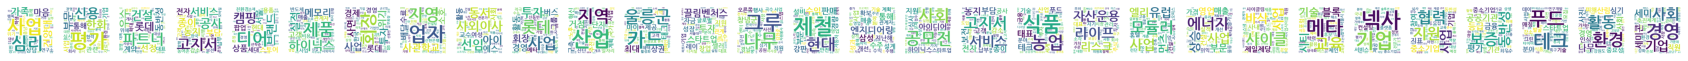

In [ ]:
wordcloud = WordCloud(
    font_path=font_path,   
    width = 300, 
    height = 300,
    max_words=50,
    background_color="white",
    random_state=0
)


plt.figure(figsize=(30,5))

for index in range(30) :  
    value = count_matrix[index].toarray().squeeze()
    key = count_vectorizer.get_feature_names()
    score = dict(zip(key, value))
    
    cloud = wordcloud.generate_from_frequencies(score)
    plt.subplot(1,30, index+1)
    plt.imshow(cloud)
    plt.axis('off')

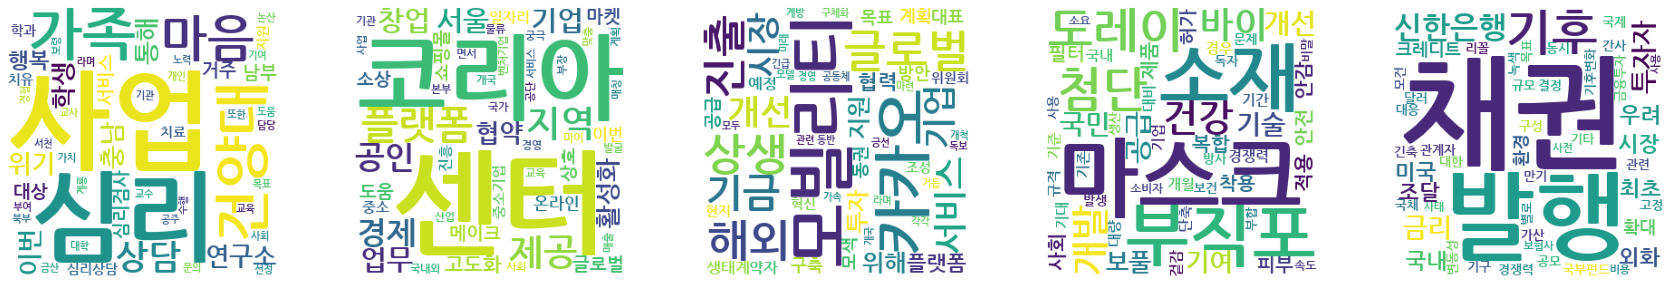

In [ ]:
wordcloud = WordCloud(
    font_path=font_path,   
    width = 300, 
    height = 300,
    max_words=50,
    background_color="white",
    random_state=0
)


plt.figure(figsize=(30,5))

for index in range(5) :  
    value = count_matrix[-index].toarray().squeeze()
    key = count_vectorizer.get_feature_names()
    score = dict(zip(key, value))
    
    cloud = wordcloud.generate_from_frequencies(score)
    plt.subplot(1,5, index+1)
    plt.imshow(cloud)
    plt.axis('off')

### 2) Using TfidfVectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer(tokenizer=tokenizer)

tfidf_matrix = tfidf_vectorizer.fit_transform(news['Article'])

In [ ]:
print('▶ 사용된 전체 단어 수 = ', len(list(tfidf_vectorizer.vocabulary_)))     # 문서에서 사용된 전체 단어 수를 확인 
print()

print(tfidf_vectorizer.get_feature_names()[ : 20])   # 알파벳 순서대로 처음 단어 20개 출력하기 
print()

print(tfidf_vectorizer.get_feature_names()[::-1][ : 20])   # 끝에서 부터 20개 단어 출력하기 
print()

print(list(tfidf_vectorizer.vocabulary_)[:100])    # 전체 단어를 list 타입으로 변환한 후 100개만 선택 출력 (출현하는 순서부터)

▶ 사용된 전체 단어 수 =  5725

['가가', '가게', '가격', '가계', '가계부채', '가공', '가구', '가기', '가까이', '가능', '가능성', '가동', '가량', '가려움', '가로', '가맹', '가미', '가방', '가사', '가산']

['희천', '희소식', '희비', '희망이', '희망버스', '희망', '흥망', '흡수', '흑자', '흐름', '휴비스', '휴먼', '휴대폰', '휠체어', '휜다', '휘민', '훼손', '훌쩍', '훈련', '훈기']

['건양대', '학교', '심리상담', '치료', '학과', '마음', '행복', '연구소', '최근', '충청남도교육청', '위기', '학생', '가족', '심리', '치유', '지원', '상담', '사업', '수행', '기관', '선정', '이번', '충남', '북부', '남부', '진행', '논산', '계룡', '공주', '부여', '서천', '보령', '청양', '금산', '담당', '거주', '위험', '대상', '학교생활', '위해', '개인', '집단', '심리검사', '서비스', '제공', '또한', '교사', '학부모', '교육', '자문', '실시', '예정', '책임자', '이영선', '교수', '통해', '자살', '자해', '경험', '청소년', '정신건강', '회복', '도움', '라며', '우리', '대학', '목표', '가치', '실현', '지역', '사회', '기여', '노력', '한편', '문의', '한화', '신용', '평가', '기업', '종합', '우수', '등급', '획득', '회사채', '어음', '신용등급', '공신', '국내', '용평', '가사', '사가', '처음', '지난', '의뢰', '자료', '제출', '인터뷰', '경영', '실적', '계획']


In [ ]:
tfidf_matrix[0].toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
tfidf_matrix[0].toarray().shape

(1, 5725)

In [ ]:
tfidf_matrix[0].toarray().squeeze()

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
tfidf_matrix[0].toarray().squeeze().shape

(5725,)

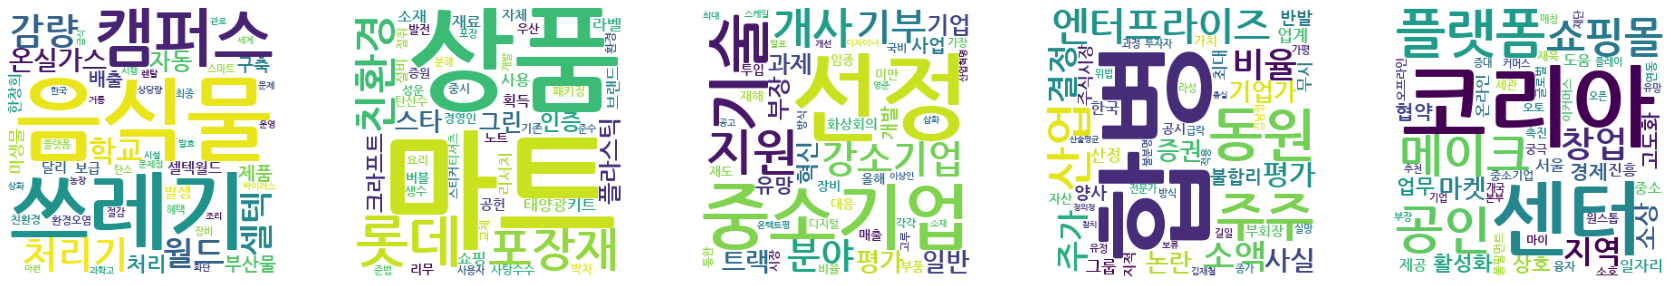

In [ ]:
wordcloud = WordCloud(
    font_path=font_path,             
    width = 300, 
    height = 300,
    max_words=50,
    background_color="white",
    random_state=0
)


plt.figure(figsize=(30,5))

for i, index in enumerate( [40, 80, 120, 160, 199] ) :   #  선정된 5개 문서의 핵심어를 출력 
    value = tfidf_matrix[index].toarray().squeeze()
    key = tfidf_vectorizer.get_feature_names()
    score = dict(zip(key, value))
    
    cloud = wordcloud.generate_from_frequencies(score)
    plt.subplot(1, 5, i+1)
    plt.imshow(cloud)
    plt.axis('off')
 
                 